# imoprt library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# About data

In [2]:
data = pd.read_csv("housePrice.csv")
data.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
len(data)

3479

In [5]:
data.shape

(3479, 8)

In [6]:
data.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [9]:
data.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

# Clear data

# For the first step, we need to delete the empty parts of the address column

In [14]:
null_Address = data['Address'].isnull().sum()
print(f"تعداد اندیس های خالی در ستون column_name: {null_Address}")
# تعداد کل اندیس های ستون column_name
total_Address = data['Address'].size
print(f"تعداد کل اندیس های ستون column_name: {total_Address}")

تعداد اندیس های خالی در ستون column_name: 23
تعداد کل اندیس های ستون column_name: 3479


In [15]:
data = data.dropna(subset=['Address'])
total_Address = data['Address'].size
print(f"تعداد کل اندیس های ستون column_name: {total_Address}")

تعداد کل اندیس های ستون column_name: 3456


# Plot Data

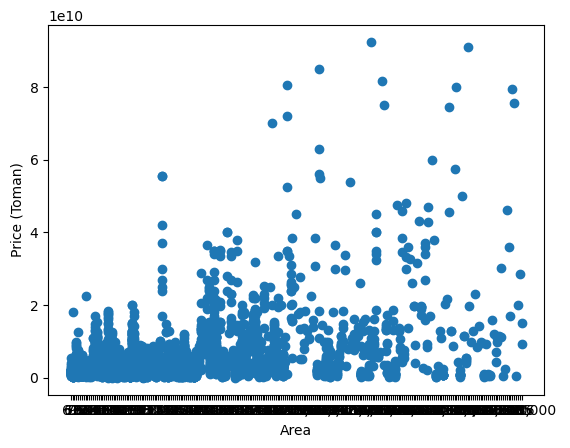

In [20]:
plt.scatter(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price (Toman)')
plt.show()

# With what we saw above, we understand from the x-axis that some values are in the form of strings

# clean data-2

In [21]:
max_area = data['Area'].max()
print('The maximum area is:', max_area)

The maximum area is: 99


In [23]:
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

In [25]:
data = data.dropna(subset=['Area'])

In [26]:
max_area = data['Area'].max()
print('The maximum area is:', max_area)

The maximum area is: 929.0


# Now we can plot this 

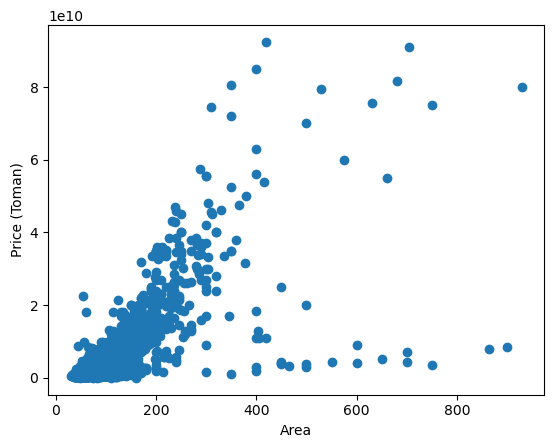

In [27]:
plt.scatter(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price (Toman)')
plt.show()

In [32]:
fdf = data[["Area","Address","Room","Price"]]
fdf.head()

,Area,Address,Room,Price
0,63.0,Shahran,1,1.850000e+09
1,60.0,Shahran,1,1.850000e+09
2,79.0,Pardis,2,5.500000e+08
3,95.0,Shahrake Qods,2,9.025000e+08
4,123.0,Shahrake Gharb,2,7.000000e+09


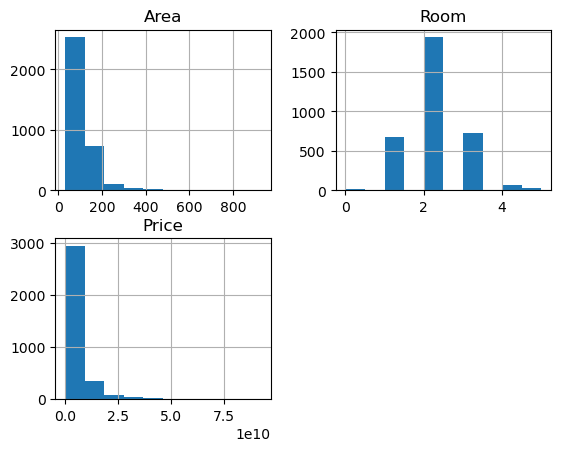

In [36]:
viz = fdf[['Area','Room','Address','Price']]
viz.hist()
plt.show()

# The address is also considered a problem

# The values of that string must be converted into a number, and there are many duplicate indices
# Duplicate indexes should be deleted, and similarly, price indexes, rooms, and others related to duplicate address indexes should be deleted.
# It's hard work  


In [37]:
# حذف ردیف‌های تکراری در ستون آدرس
data = data.drop_duplicates(subset='Address')

# حذف نمونه‌های مربوط به ردیف‌های پاک شده در ستون آدرس
data = data.drop(data.index.difference(data['Address'].index))

In [38]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70.0,2,True,True,False,North Program Organization,2.050000e+09,68333.33


In [39]:
null_Address = data['Address'].isnull().sum()
print(f"تعداد اندیس های خالی در ستون column_name: {null_Address}")
# تعداد کل اندیس های ستون column_name
total_Address = data['Address'].size
print(f"تعداد کل اندیس های ستون column_name: {total_Address}")

تعداد اندیس های خالی در ستون column_name: 0
تعداد کل اندیس های ستون column_name: 192


In [40]:
null_Area = data['Area'].isnull().sum()
print(f"تعداد اندیس های خالی در ستون column_name: {null_Area}")
# تعداد کل اندیس های ستون column_name
total_Area = data['Area'].size
print(f"تعداد کل اندیس های ستون column_name: {total_Area}")

تعداد اندیس های خالی در ستون column_name: 0
تعداد کل اندیس های ستون column_name: 192


# Well, we come to the main problem
# Addresses are strings
# And as you know, we cannot make the model with strings
# I really don't know how successful I will be because this is the first time I have encountered this problem

# We can give addresses an ID
# which is in the form of a number
# Using SKLearn preprocessing

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Address_id'] = le.fit_transform(data['Address'])
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Address_id
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67,156
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33,117
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,152
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,150
5,70.0,2,True,True,False,North Program Organization,2.050000e+09,68333.33,106


In [48]:
# test 
address = 'Shahrake Gharb'
address_id = le.transform([address])
print(f"The ID of address '{address}' is: {address_id[0]}")

The ID of address 'Shahrake Gharb' is: 150


# I was successful
# I think the dataset has reached a good state, now we have to make the model
# I use multiple regression :)))))

In [49]:
fdf = data[["Area","Address_id","Room","Price"]]
fdf.head()

,Area,Address_id,Room,Price
0,63.0,156,1,1.850000e+09
2,79.0,117,2,5.500000e+08
3,95.0,152,2,9.025000e+08
4,123.0,150,2,7.000000e+09
5,70.0,106,2,2.050000e+09


In [50]:
null_Area = fdf['Area'].isnull().sum()
print(f"تعداد اندیس های خالی در ستون column_name: {null_Area}")
# تعداد کل اندیس های ستون column_name
total_Area = fdf['Area'].size
print(f"تعداد کل اندیس های ستون column_name: {total_Area}")

تعداد اندیس های خالی در ستون column_name: 0
تعداد کل اندیس های ستون column_name: 192


# In order not to overfit, it is necessary to divide it into two parts
# I do 80/20

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Address_id', 'Room', 'Area']], data['Price'], test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = model.predict(X_test)

In [79]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

R2 Score: 0.6975510277109982
